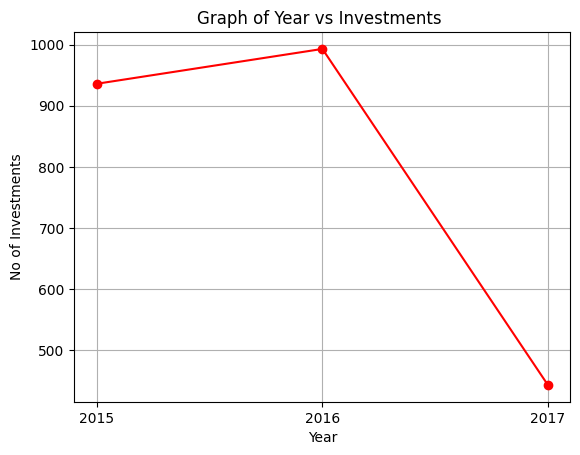

Year -  2015 , Investments -  936
Year -  2016 , Investments -  993
Year -  2017 , Investments -  443


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def extract_year(date_str):
    try:
        date_obj = datetime.strptime(date_str, "%d/%m/%Y")
    except ValueError:
        try:
            date_obj = datetime.strptime(date_str, "%d/%m.%Y")
        except ValueError:
            date_obj = datetime.strptime(date_str, "%d/%m//%Y")
    return date_obj.year

d_fr = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
d_fr["year"] = d_fr["Date"].apply(extract_year)
grp = d_fr.groupby("year")
dic_1 = {i:len(j) for i,j in grp}
year = np.array(list(dic_1.keys()))
no_inv = np.array(list(dic_1.values()))
plt.plot(year,no_inv,marker = 'o',color="red")
plt.xticks(year)
plt.xlabel("Year")
plt.ylabel("No of Investments")
plt.title("Graph of Year vs Investments ")
plt.grid(True)
plt.show()
for i,j in dic_1.items():
    print("Year - ",i,", Investments - ",j)

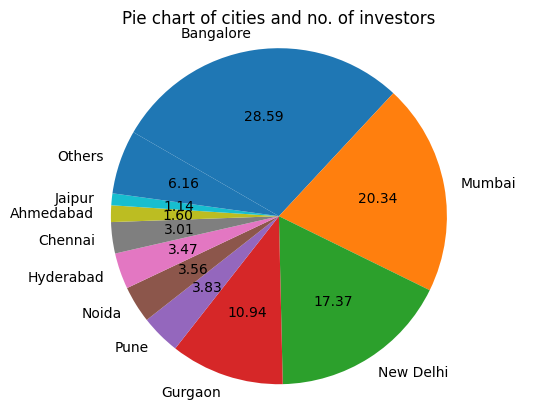

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_2 = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
gr1 = df_2.groupby('CityLocation')
gr1.size()
dic_ct = {i:len(j) for i,j in gr1}
dic_ct1 = {i:j for i,j in sorted(dic_ct.items(),key=lambda item: item[1], reverse=True)}
City = np.array(list(dic_ct1.keys()))[:10]
City = np.append(City,"Others")
Inv = np.array(list(dic_ct1.values()))[:10]
Inv = np.append(Inv,sum(dic_ct.values())-Inv.sum())
plt.pie(Inv,labels = City,autopct = "%.2f",counterclock = False,startangle = 150)
plt.title("Pie chart of cities and no. of investors")
plt.axis("equal")
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
d_fr = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
gr2 = d_fr.groupby("CityLocation")
dct = {i:len(j) for i,j in gr2}
dct2 = {i:round(float((j/sum(dct.values()))*100),2) for i,j in sorted(dct.items(),key=lambda item: item[1], reverse=True)}
for i,j in islice(dct2.items(), 10):
    print("City - ",i," percentage of ivestment - ",j)

City -  Bangalore  percentage of ivestment -  28.59
City -  Mumbai  percentage of ivestment -  20.34
City -  New Delhi  percentage of ivestment -  17.37
City -  Gurgaon  percentage of ivestment -  10.94
City -  Pune  percentage of ivestment -  3.83
City -  Noida  percentage of ivestment -  3.56
City -  Hyderabad  percentage of ivestment -  3.47
City -  Chennai  percentage of ivestment -  3.01
City -  Ahmedabad  percentage of ivestment -  1.6
City -  Jaipur  percentage of ivestment -  1.14


<class 'pandas.core.series.Series'>


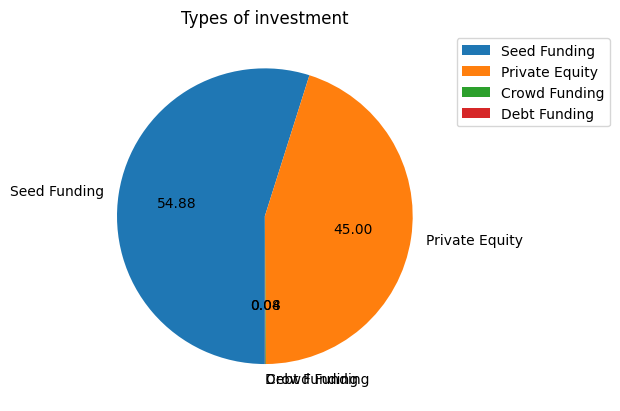

Seed Funding  -  54.87
Private Equity  -  45.0
Crowd Funding  -  0.08
Debt Funding  -  0.04


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_3 = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
cond = df_3["InvestmentType"] == "SeedFunding"
df_3.loc[cond,'InvestmentType'] = "Seed Funding"
cond = df_3["InvestmentType"] == "Crowd funding"
df_3.loc[cond,'InvestmentType'] = "Crowd Funding"
cond = df_3["InvestmentType"] == "PrivateEquity"
df_3.loc[cond,'InvestmentType'] = "Private Equity"
grp2 = df_3.groupby("InvestmentType")
dct_1 = {i:len(j) for i,j in grp2}
dct_2 = {i:round(float((j/sum(dct_1.values()))*100),2) for i,j in sorted(dct_1.items(),key=lambda item:item[1], reverse=True)}
arr = np.array(list(dct_2.values()))
Inv = np.array(list(dct_2.keys()))
plt.title("Types of investment")
plt.pie(arr,labels=Inv,autopct = "%.2f",counterclock = False, startangle= 270)
plt.legend(labels=Inv, bbox_to_anchor=(1, 1))
plt.show()
for i,j in zip(Inv,arr):
    print(i," - ",j)

Consumer Internet  -  35.07
Technology  -  14.22
eCommerce  -  7.77
ECommerce  -  2.41
Healthcare  -  1.36


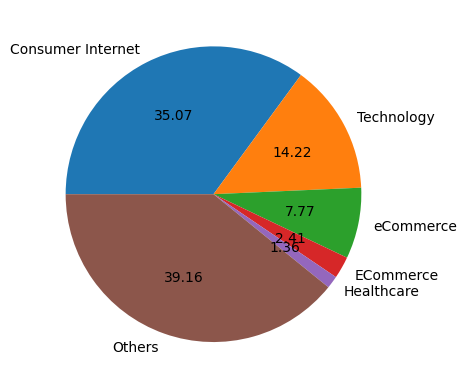

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
df = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
gr = df.groupby("IndustryVertical")
dct = {i:len(j) for i,j in gr}
dct2 = {i:float((j/sum(dct.values()))*100) for i,j in sorted(dct.items(),key=lambda item:item[1], reverse=True)}
for i,j in islice(dct2.items(), 5):
    print(i," - ",round(j,2))
a = np.array(list(dct2.keys()))[:5]
a = np.append(a,"Others")
b = np.array(list(dct2.values()))[:5]
b = np.append(b,sum(dct2.values())-b.sum())
plt.pie(b, labels = a, autopct = "%.2f", counterclock = False, startangle = 180)
plt.show()

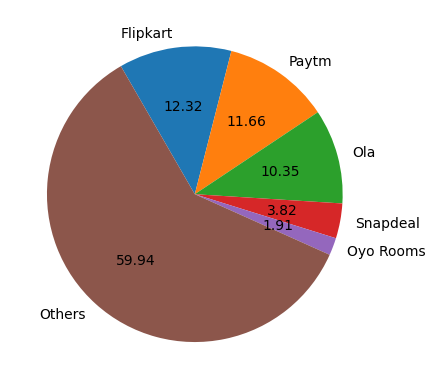

Flipkart  -  2259700000
Paytm  -  2140000000
Ola  -  1899500000
Snapdeal  -  700000000
Oyo Rooms  -  350000000
Others  -  10998186476


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
dframe = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/python projects/datasets/startup_funding.csv")
cond = dframe["StartupName"] == "Flipkart.com"
dframe.loc[cond,'StartupName'] = "Flipkart"
cond = dframe["StartupName"].isin(["Ola Cabs", "Olacabs"])
dframe.loc[cond,'StartupName'] = "Ola"
dframe["AmountInUSD"] = dframe["AmountInUSD"].str.replace(',', '').str.replace('$', '').astype(float)
grpb = dframe.groupby("StartupName")["AmountInUSD"].sum().to_dict()
grpb2 = {i:int(j) for i,j in sorted(grpb.items(),key=lambda item:item[1], reverse=True)}
arr = np.array(list(grpb2.keys()))[:5]
arr = np.append(arr,"Others")
amnt = np.array(list(grpb2.values()))[:5]
amnt = np.append(amnt,sum(grpb2.values())-amnt.sum())
plt.pie(amnt, labels = arr, autopct = "%.2f", counterclock = False, startangle = 120)
plt.show()
for i,j in zip(arr,amnt):
    print(i," - ",j)